In [2]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

## MLPClassifier tests with separate datasets

In [3]:
row_test_percentage = 5
files = ['home_lab(L)', 'home_lab(R)', 'meeting_room', 'lecture_room', 'living_room']

data = {
    'CSI': {},
    'labels': {}
}

for f in files:
    _ = sio.loadmat(f'data/dataset_{f}.mat')
    data['CSI'][f] = _.get('dataset_CSI')
    data['labels'][f] = _.get('dataset_labels')


### Reset the model after each iteration

In [10]:
num_iter = 10
results_model_reset = [[], [], [], [], []]

for i in range(num_iter):
    print(f'>>> Iteration {i+1}')
    print('Error rates :', end = ' ')
    for f in range(len(files)):
        file = files[f]
        # Data 
        _csi = data['CSI'].get(file)
        X = _csi.mean(2)
        y = data['labels'].get(file)
        y = np.ravel(y)

        # Split data for tests
        rows = [_ for _ in range(X.shape[0])]
        np.random.shuffle(rows)
        X = X[rows]
        y = y[rows]
        test_row_count = int(X.shape[0] * row_test_percentage / 100)
        X_train = X[test_row_count:, :]
        y_train = y[test_row_count:]
        X_test = X[:test_row_count, :]
        y_test = y[:test_row_count]

        # Create and train the model
        model = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (50, 15), max_iter = 1500)
        model.fit(X_train, y_train)

        # Test our model
        prediction = model.predict(X_test)
        diff = prediction != y_test
        error_rate = np.sum(diff)/y_test.shape[0]

        # print(f'For the file {file}, error : {error_rate} ({test_row_count} test rows)')
        results_model_reset[f].append(error_rate)
        print(f'{round(error_rate, 3)} ({X_test.shape[0]} test row)', end = ' ')
    print()
        
        

>>> Iteration 1
Error rates : 0.5 (4 test row) 0.75 (4 test row) 0.167 (6 test row) 0.4 (10 test row) 0.583 (12 test row) 
>>> Iteration 2
Error rates : 0.5 (4 test row) 0.0 (4 test row) 0.667 (6 test row) 0.5 (10 test row) 0.583 (12 test row) 
>>> Iteration 3
Error rates : 0.5 (4 test row) 0.75 (4 test row) 0.5 (6 test row) 0.6 (10 test row) 0.167 (12 test row) 
>>> Iteration 4
Error rates : 0.0 (4 test row) 0.75 (4 test row) 0.667 (6 test row) 0.4 (10 test row) 0.5 (12 test row) 
>>> Iteration 5
Error rates : 0.5 (4 test row) 0.5 (4 test row) 0.5 (6 test row) 0.3 (10 test row) 0.333 (12 test row) 
>>> Iteration 6
Error rates : 0.0 (4 test row) 0.75 (4 test row) 0.333 (6 test row) 0.4 (10 test row) 0.417 (12 test row) 
>>> Iteration 7
Error rates : 0.5 (4 test row) 0.75 (4 test row) 0.833 (6 test row) 0.7 (10 test row) 0.5 (12 test row) 
>>> Iteration 8
Error rates : 0.5 (4 test row) 0.75 (4 test row) 0.5 (6 test row) 0.5 (10 test row) 0.417 (12 test row) 
>>> Iteration 9
Error rates 

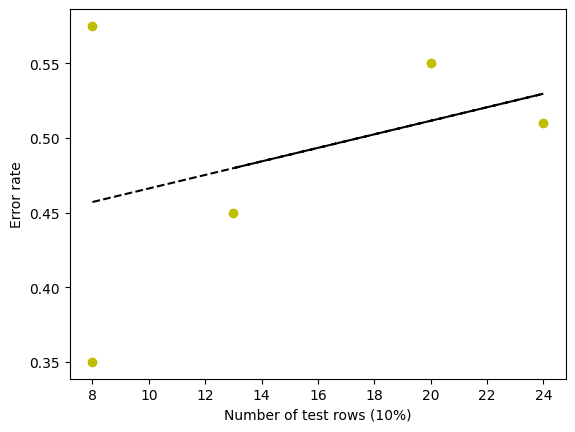

In [11]:
results = np.matrix(results_model_reset)
_ = results.mean(1).T.tolist()[0]
x = [8, 8, 20, 24, 13]

coef = np.polyfit(x, _, 1)


plt.plot(x, _, 'yo', x, np.poly1d(coef)(x), '--k')
plt.xlabel('Number of test rows (10%)')
plt.ylabel('Error rate')
plt.show()

### Reuse the model after the test

In [70]:
num_iter = 10
results_model_retrain = [[], [], [], [], []]

for f in range(len(files)):
    file = files[f]
    print(f'>>> File {file}')

    _csi = data['CSI'].get(file)
    X = _csi.mean(2)
    y = data['labels'].get(file)
    y = np.ravel(y)

    model = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (50, 15), max_iter = 1500)

    for i in range(num_iter):
        # Split data for tests
        np.random.shuffle(X)
        np.random.shuffle(y)
        test_row_count = int(X.shape[0] * row_test_percentage / 100)
        X_train = X[test_row_count:, :]
        y_train = y[test_row_count:]
        X_test = X[:test_row_count, :]
        y_test = y[:test_row_count]

        model.fit(X_train, y_train)

        # Test our model
        prediction = model.predict(X_test)
        diff = prediction != y_test
        error_rate = np.sum(diff)/y_test.shape[0]

        # print(f'For the file {file}, error : {error_rate} ({test_row_count} test rows)')
        results_model_retrain[f].append(error_rate)
        print(f'{round(error_rate, 3)} (iteration {i+1})', end = ' ')
    print()

>>> File home_lab(L)
0.5 (iteration 1) 0.5 (iteration 2) 0.0 (iteration 3) 0.5 (iteration 4) 0.25 (iteration 5) 0.75 (iteration 6) 0.5 (iteration 7) 0.25 (iteration 8) 0.75 (iteration 9) 0.5 (iteration 10) 
>>> File home_lab(R)
0.5 (iteration 1) 0.5 (iteration 2) 0.5 (iteration 3) 0.25 (iteration 4) 0.75 (iteration 5) 0.75 (iteration 6) 0.0 (iteration 7) 0.5 (iteration 8) 0.5 (iteration 9) 0.75 (iteration 10) 
>>> File meeting_room
0.5 (iteration 1) 0.5 (iteration 2) 0.667 (iteration 3) 0.333 (iteration 4) 0.333 (iteration 5) 0.833 (iteration 6) 0.667 (iteration 7) 0.667 (iteration 8) 0.5 (iteration 9) 0.333 (iteration 10) 
>>> File lecture_room
0.6 (iteration 1) 0.5 (iteration 2) 0.6 (iteration 3) 0.5 (iteration 4) 0.5 (iteration 5) 0.6 (iteration 6) 0.6 (iteration 7) 0.8 (iteration 8) 0.2 (iteration 9) 0.6 (iteration 10) 
>>> File living_room
0.75 (iteration 1) 0.417 (iteration 2) 0.5 (iteration 3) 0.417 (iteration 4) 0.833 (iteration 5) 0.417 (iteration 6) 0.333 (iteration 7) 0.583 

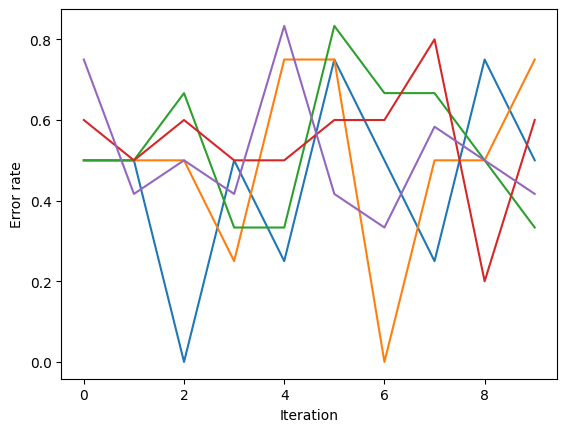

In [76]:
results = np.matrix(results_model_retrain)
plt.plot(results.T)
plt.xlabel('Iteration')
plt.ylabel('Error rate')
plt.show()

## Group all datasets 

In [8]:
full_data = np.concatenate([data['CSI'][f] for f in files]).mean(2)
full_labels = np.concatenate([data['labels'][f] for f in files])

In [20]:
num_iter = 10
results = []

for i in range(num_iter):
    # Split the data
    rows = [_ for _ in range(full_data.shape[0])]
    np.random.shuffle(rows)
    shuffled_data = full_data[rows]
    shuffled_labels = full_labels[rows].ravel()

    test_rows_count = int(full_data.shape[0] * 0.1)

    X_train = shuffled_data[:test_rows_count, :]
    y_train = shuffled_labels[:test_rows_count]

    X_test = shuffled_data[test_rows_count:, :]
    y_test = shuffled_labels[test_rows_count:]

    # Create and train the model
    model = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (500, 150), max_iter = 1500)
    model.fit(X_train, y_train)

    # Test the model
    prediction = model.predict(X_test)
    diff = prediction != y_test
    error = np.sum(diff)
    error_rate = error / X_test.shape[0]

    print(f'Error rate: {error_rate}')
    results.append(error_rate)

print(np.array(results).mean())

Error rate: 0.4780058651026393


KeyboardInterrupt: 